<a href="https://colab.research.google.com/github/leandrorodor/ALR-Machine_Learning_AS/blob/main/random_forest_bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

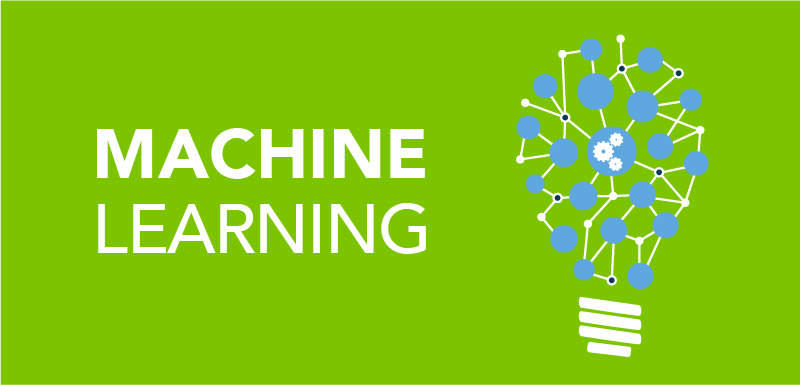

In [12]:
from IPython.display import Image
Image('/content/sample_data/banner_machine_learning.png')

## Random Forest e Bagging

### Imports gerais

In [1]:
import pandas as pd
import numpy as np 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Imports modelos

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor,BaggingClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

Download Dataset: [movies_multilinear_reg.csv](https://s3.amazonaws.com/caelum-online-public/machine-learning-aprendizado-supervisionado/movies_multilinear_reg.csv)

#### Carregando o dataset

In [3]:
filmes = pd.read_csv('/content/sample_data/movies_multilinear_reg.csv')

In [ ]:
filmes.head(5)

,movieId,Titulo,Documentary,Sci-Fi,Mystery,Horror,Romance,Thriller,Crime,Fantasy,Comedy,Animation,Children,Drama,Adventure,Duracao,Investimento,Bilheteria
0,1,Toy Story (1995),0,0,0,0,0,0,0,1,1,1,1,0,1,103.468310,11.048216,5623234.602
1,2,Jumanji (1995),0,0,0,0,0,0,0,1,0,0,1,0,1,112.337916,14.927678,5714951.757
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,1,0,0,0,0,116.245732,27.114597,9524339.124
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,0,1,0,0,1,0,120.317732,4.994242,6331568.779
4,5,Father of the Bride Part II (1995),0,0,0,0,0,0,0,0,1,0,0,0,0,110.023572,19.142246,6409617.277


In [ ]:
filmes.shape

(9125, 18)

#### Separando o dataset

In [4]:
filmes_caract = filmes[filmes.columns[2:17]]
filmes_labels = filmes[filmes.columns[17:]]

In [5]:
filmes_caract.head(5)

,Documentary,Sci-Fi,Mystery,Horror,Romance,Thriller,Crime,Fantasy,Comedy,Animation,Children,Drama,Adventure,Duracao,Investimento
0,0,0,0,0,0,0,0,1,1,1,1,0,1,103.468310,11.048216
1,0,0,0,0,0,0,0,1,0,0,1,0,1,112.337916,14.927678
2,0,0,0,0,1,0,0,0,1,0,0,0,0,116.245732,27.114597
3,0,0,0,0,1,0,0,0,1,0,0,1,0,120.317732,4.994242
4,0,0,0,0,0,0,0,0,1,0,0,0,0,110.023572,19.142246


In [6]:
filmes_labels.head(5)

,Bilheteria
0,5623234.602
1,5714951.757
2,9524339.124
3,6331568.779
4,6409617.277


#### Split dos datasets em treino e teste

In [7]:
treino, teste, treino_labels, teste_labels = train_test_split(filmes_caract, filmes_labels)
print('Shape do treino {}, Shape do treino_labels {}'.format(treino.shape, treino_labels.shape))
print('Shape do teste {}, Shape do teste_labels {}'.format(teste.shape, teste_labels.shape))
print('Proporção Treino / Teste: {0:.2f}% / {1:.2f}%'.format(len(treino)/len(filmes_caract)*100, len(teste)/len(filmes_caract)*100))

Shape do treino (6843, 15), Shape do treino_labels (6843, 1)
Shape do teste (2282, 15), Shape do teste_labels (2282, 1)
Proporção Treino / Teste: 74.99% / 25.01%


#### Reshaping com numpy

In [8]:
treino_arr = np.array(treino).reshape(len(treino),15)
teste_arr = np.array(teste).reshape(len(teste),15)
treino_labels_arr = treino_labels.values.ravel()
teste_labels_arr = teste_labels.values.ravel()

## Usando modelo BaggingRegressor

In [ ]:
modelo_br = BaggingRegressor()
modelo_br.fit(treino_arr, treino_labels_arr)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [ ]:
score_treino = modelo_br.score(treino_arr, treino_labels_arr)
score_teste = modelo_br.score(teste_arr, teste_labels_arr)
print('BaggingRegressor: Acertamos {0:.2f}% no treino, Acertamos {1:.2f}% no teste'.
      format(score_treino * 100, score_teste * 100))

BaggingRegressor: Acertamos 96.43% no treino, Acertamos 78.02% no teste


#### Para comparação usando modelo LinearRegression

In [9]:
modelo_reg = LinearRegression()
modelo_reg.fit(treino_arr, treino_labels_arr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
score_treino = modelo_reg.score(treino_arr, treino_labels_arr)
score_teste = modelo_reg.score(teste_arr, teste_labels_arr)
print('LinearRegression: Acertamos {0:.2f}% no treino, Acertamos {1:.2f}% no teste'.
      format(score_treino * 100, score_teste * 100))

LinearRegression: Acertamos 82.56% no treino, Acertamos 83.34% no teste


#### Usando BaggingRegressor(n_estimators=20)

In [11]:
modelo_br_20 = BaggingRegressor(n_estimators=20)
modelo_br_20.fit(treino_arr, treino_labels_arr)
score_treino = modelo_br_20.score(treino_arr, treino_labels_arr)
score_teste = modelo_br_20.score(teste_arr, teste_labels_arr)
print('BaggingRegressor(n_estimators=20): Acertamos {0:.2f}% no treino, Acertamos {1:.2f}% no teste'.
      format(score_treino * 100, score_teste * 100))

BaggingRegressor(n_estimators=20): Acertamos 96.85% no treino, Acertamos 79.85% no teste


## Classifcação com BaggingClassifier
Download Dataset: [avaliacoes_usuario.csv](https://s3.amazonaws.com/caelum-online-public/machine-learning-aprendizado-supervisionado/avaliacoes_usuario.csv)

#### Carregando Dataset da avaliações do usuário (gostos)

In [ ]:
gostos = pd.read_csv('datasets/avaliacoes_usuario.csv')
gostos.head(5)

,Titulo,Documentary,Sci-Fi,Mystery,Horror,Romance,Thriller,Crime,Fantasy,Comedy,Animation,Children,Drama,Adventure,Duracao,Investimento,Gostou
0,Nixon (1995),0,0,0,0,0,0,0,0,0,0,0,1,0,114.496547,7.930748,1
1,Leaving Las Vegas (1995),0,0,0,0,1,0,0,0,0,0,0,1,0,110.140191,18.276555,1
2,Persuasion (1995),0,0,0,0,1,0,0,0,0,0,0,1,0,105.747597,16.582232,1
3,Babe (1995),0,0,0,0,0,0,0,0,0,0,1,1,0,126.131978,13.004553,1
4,Carrington (1995),0,0,0,0,1,0,0,0,0,0,0,1,0,85.025469,14.418120,1


#### Separando dataset

In [ ]:
caract = gostos[gostos.columns[1:16]]
labels = gostos[gostos.columns[16:]]
treino, teste, treino_labels, teste_labels = train_test_split(caract, labels)

#### Reshaping do treino e teste com numpy

In [ ]:
treino_arr = np.array(treino).reshape(len(treino), 15)
teste_arr = np.array(teste).reshape(len(teste), 15)
treino_labels_arr = treino_labels.values.ravel()
teste_labels_arr = teste_labels.values.ravel()

#### Usando BaggingClassifier

In [ ]:
modelo_bc = BaggingClassifier()
modelo_bc.fit(treino_arr, treino_labels_arr)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [ ]:
previsoes = modelo_bc.predict(teste_arr)
acuracia = accuracy_score(teste_labels_arr, previsoes)
print('Acuracia com BaggingClassifier no teste: {0:.2f}%'.format(acuracia * 100))

Acuracia com BaggingClassifier no teste: 73.53%


## Usando RandomForestRegressor

Download Dataset: [movies_multilinear_reg.csv](https://s3.amazonaws.com/caelum-online-public/machine-learning-aprendizado-supervisionado/movies_multilinear_reg.csv)

#### Carregando o dataset

In [ ]:
filmes = pd.read_csv('datasets/movies_multilinear_reg.csv')

#### Separando o dataset

In [ ]:
filmes_caract = filmes[filmes.columns[2:17]]
filmes_labels = filmes[filmes.columns[17:]]

#### Split dos datasets em treino e teste

In [ ]:
treino, teste, treino_labels, teste_labels = train_test_split(filmes_caract, filmes_labels)
print('Shape do treino {}, Shape do treino_labels {}'.format(treino.shape, treino_labels.shape))
print('Shape do teste {}, Shape do teste_labels {}'.format(teste.shape, teste_labels.shape))
print('Proporção Treino / Teste: {0:.2f}% / {1:.2f}%'.format(len(treino)/len(filmes_caract)*100, len(teste)/len(filmes_caract)*100))

Shape do treino (6843, 15), Shape do treino_labels (6843, 1)
Shape do teste (2282, 15), Shape do teste_labels (2282, 1)
Proporção Treino / Teste: 74.99% / 25.01%


#### Reshaping com numpy

In [ ]:
treino_arr = np.array(treino).reshape(len(treino),15)
teste_arr = np.array(teste).reshape(len(teste),15)
treino_labels_arr = treino_labels.values.ravel()
teste_labels_arr = teste_labels.values.ravel()

#### Usando modelo RandomForestRegressor

In [ ]:
modelo_rfr = RandomForestRegressor()
modelo_rfr.fit(treino_arr, treino_labels_arr)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [ ]:
score_treino = modelo_rfr.score(treino_arr, treino_labels_arr)
score_teste = modelo_rfr.score(teste_arr, teste_labels_arr)
print('RandomForestRegressor: Acertamos {0:.2f}% no treino, Acertamos {1:.2f}% no teste'.
      format(score_treino * 100, score_teste * 100))

RandomForestRegressor: Acertamos 96.39% no treino, Acertamos 79.13% no teste


## Classificação com RandomForestClassifier

#### Carregando Dataset da avaliações do usuário (gostos)

In [ ]:
gostos = pd.read_csv('datasets/avaliacoes_usuario.csv')

#### Separando dataset

In [ ]:
caract = gostos[gostos.columns[1:16]]
labels = gostos[gostos.columns[16:]]
treino, teste, treino_labels, teste_labels = train_test_split(caract, labels)

#### Reshaping do treino e teste com numpy

In [ ]:
treino_arr = np.array(treino).reshape(len(treino), 15)
teste_arr = np.array(teste).reshape(len(teste), 15)
treino_labels_arr = treino_labels.values.ravel()
teste_labels_arr = teste_labels.values.ravel()

## Usando RandomForestClassifier

In [ ]:
modelo_rfc = RandomForestClassifier()
modelo_rfc.fit(treino_arr, treino_labels_arr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
previsoes = modelo_rfc.predict(teste_arr)
acuracia = accuracy_score(teste_labels_arr, previsoes)
print('Acuracia com RandomForestClassifier no teste: {0:.2f}%'.format(acuracia * 100))

Acuracia com RandomForestClassifier no teste: 75.88%


## Usando RandomForestClassifier(max_features=5, max_depth=5)

In [ ]:
modelo_rfc_max5 = RandomForestClassifier(max_features=5, max_depth=5)
modelo_rfc_max5.fit(treino_arr, treino_labels_arr)
previsoes = modelo_rfc_max5.predict(teste_arr)
acuracia = accuracy_score(teste_labels_arr, previsoes)
print('Acuracia com RandomForestClassifier no teste: {0:.2f}%'.format(acuracia * 100))

Acuracia com RandomForestClassifier no teste: 81.18%


# Aula 5 Video 2 - Boosting

Download Dataset: [movies_multilinear_reg.csv](https://s3.amazonaws.com/caelum-online-public/machine-learning-aprendizado-supervisionado/movies_multilinear_reg.csv)

#### Carregando o dataset

In [ ]:
filmes = pd.read_csv('datasets/movies_multilinear_reg.csv')

#### Split dos datasets em treino e teste

In [ ]:
filmes_caract = filmes[filmes.columns[2:17]]
filmes_labels = filmes[filmes.columns[17:]]

#### Split dos dados treino e teste

In [ ]:
treino, teste, treino_labels, teste_labels = train_test_split(filmes_caract, filmes_labels)
print('Shape do treino {}, Shape do treino_labels {}'.format(treino.shape, treino_labels.shape))
print('Shape do teste {}, Shape do teste_labels {}'.format(teste.shape, teste_labels.shape))
print('Proporção Treino / Teste: {0:.2f}% / {1:.2f}%'.format(len(treino)/len(filmes_caract)*100, len(teste)/len(filmes_caract)*100))

Shape do treino (6843, 15), Shape do treino_labels (6843, 1)
Shape do teste (2282, 15), Shape do teste_labels (2282, 1)
Proporção Treino / Teste: 74.99% / 25.01%


#### Reshaping do treino e teste com numpy

In [ ]:
treino_arr = np.array(treino).reshape(len(treino), 15)
teste_arr = np.array(teste).reshape(len(teste), 15)
treino_labels_arr = treino_labels.values.ravel()
teste_labels_arr = teste_labels.values.ravel()

## Usando AdaBoostRegressor

In [ ]:
modelo_ada = AdaBoostRegressor()
modelo_ada.fit(treino_arr, treino_labels_arr)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

In [ ]:
score_treino = modelo_ada.score(treino_arr, treino_labels_arr)
score_teste = modelo_ada.score(teste_arr, teste_labels_arr)
print('AdaBoostRegressor: Acertamos {0:.2f}% no treino, Acertamos {1:.2f}% no teste'.
      format(score_treino * 100, score_teste * 100))

AdaBoostRegressor: Acertamos 80.43% no treino, Acertamos 78.55% no teste


## Usando GradientBoostingRegressor 

#### Separando o dataset

In [ ]:
modelo_gbr = GradientBoostingRegressor()
modelo_gbr.fit(treino_arr, treino_labels_arr)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [ ]:
score_treino = modelo_gbr.score(treino_arr, treino_labels_arr)
score_teste = modelo_gbr.score(teste_arr, teste_labels_arr)
print('GradientBoostingRegressor: Acertamos {0:.2f}% no treino, Acertamos {1:.2f}% no teste'.
      format(score_treino * 100, score_teste * 100))

GradientBoostingRegressor: Acertamos 84.45% no treino, Acertamos 81.68% no teste


## Usando AdaBoostClassifier 

#### Carregando Dataset da avaliações do usuário (gostos)

In [ ]:
gostos = pd.read_csv('datasets/avaliacoes_usuario.csv')

#### Separando dataset

In [ ]:
caract = gostos[gostos.columns[1:16]]
labels = gostos[gostos.columns[16:]]
treino, teste, treino_labels, teste_labels = train_test_split(caract, labels)

#### Reshaping do treino e teste com numpy

In [ ]:
treino_arr = np.array(treino).reshape(len(treino), 15)
teste_arr = np.array(teste).reshape(len(teste), 15)
treino_labels_arr = treino_labels.values.ravel()
teste_labels_arr = teste_labels.values.ravel()

In [ ]:
modelo_ada_cl = AdaBoostClassifier()
modelo_ada_cl.fit(treino_arr, treino_labels_arr)
previsoes = modelo_ada_cl.predict(teste_arr)
acuracia = accuracy_score(teste_labels_arr, previsoes)
print('Acuracia com AdaBoostClassifier no teste: {0:.2f}%'.format(acuracia * 100))

Acuracia com AdaBoostClassifier no teste: 78.24%


## Usando GradientBoostingClassifier

In [ ]:
modelo_gb_cl = GradientBoostingClassifier()
modelo_gb_cl.fit(treino_arr, treino_labels_arr)
previsoes = modelo_gb_cl.predict(teste_arr)
acuracia = accuracy_score(teste_labels_arr, previsoes)
print('Acuracia com GradientBoostingClassifier no teste: {0:.2f}%'.format(acuracia * 100))

Acuracia com GradientBoostingClassifier no teste: 79.41%
